<a href="https://colab.research.google.com/github/Ahamed-h/Handwritten-Digit-Recognition-using-Neural-Networks-MNIST-Dataset-/blob/main/mnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
mnist = tf.keras.datasets.mnist


In [ ]:
(x_tr, y_tr),(x_ts,y_ts) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_tr = tf.keras.utils.normalize(x_tr,axis=1) # or just divide by 255 for image
x_ts = tf.keras.utils.normalize(x_ts,axis=1)

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation = "relu"))
model.add(tf.keras.layers.Dense(128,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_dense = model.fit(x_tr,y_tr,epochs=3)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8686 - loss: 0.4756
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9661 - loss: 0.1137
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9774 - loss: 0.0719


In [ ]:
model.save('modelA.h5')

In [ ]:
model1 = tf.keras.models.load_model('modelA.h5')
loss , acc = model1.evaluate(x_ts,y_ts)
print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1165
0.10384539514780045
0.9681000113487244


In [ ]:
img = cv2.imread("1.png", cv2.IMREAD_GRAYSCALE) # Read image as grayscale
img = cv2.resize(img, (28, 28))
img = np.invert(np.array([img]))
pred = model.predict(img)
print("this is maybe",np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
this is maybe 1


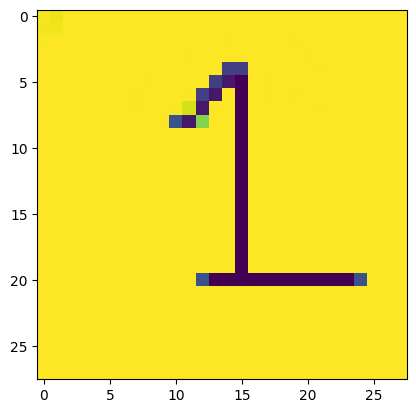

In [30]:
i =cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(i)

# CNN

In [21]:
x_tr_cnn = x_tr.reshape(-1, 28, 28, 1)
x_ts_cnn = x_ts.reshape(-1, 28, 28, 1)

In [35]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
cnn_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_cnn = cnn_model.fit(x_tr_cnn,y_tr,epochs=3)
cnn_model.save('modelB.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8896 - loss: 0.3466
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9831 - loss: 0.0551
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9893 - loss: 0.0324


In [27]:
model2 = tf.keras.models.load_model('modelB.h5')
closs , cacc = model2.evaluate(x_ts_cnn,y_ts)
print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0461
0.036447085440158844
0.9889000058174133


In [28]:
img_cnn = img.reshape(1,28,28,1) / 255
cnn_pred = model2.predict(img_cnn)
print("this is maybe",np.argmax(cnn_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
this is maybe 1


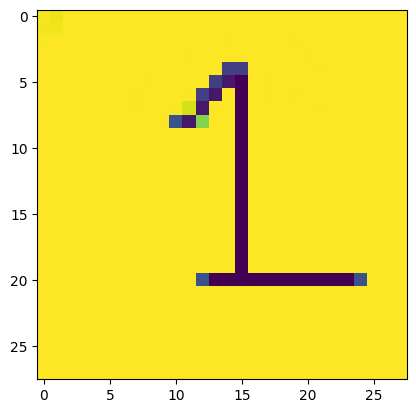

In [31]:
i =cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(i)

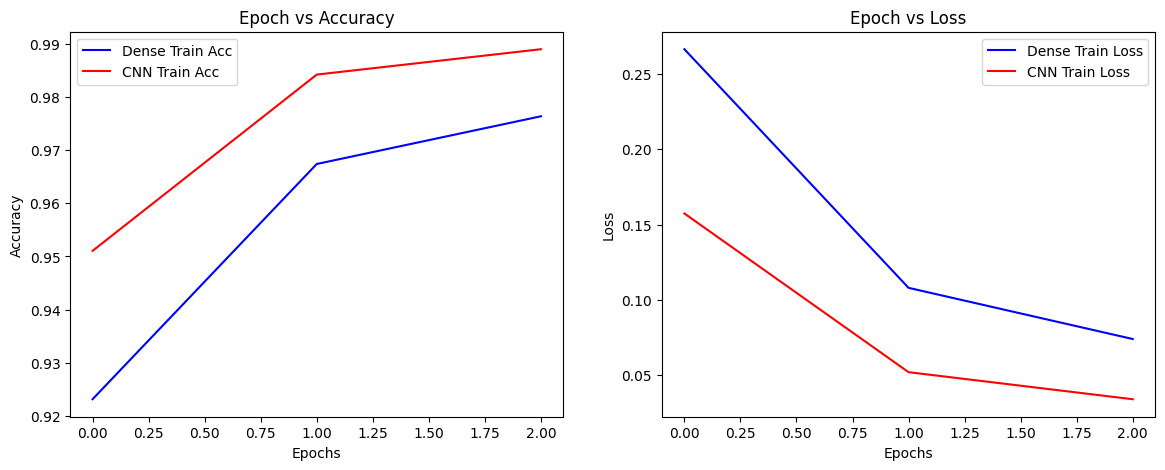

In [40]:
plt.figure(figsize=(14, 5))
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Dense Train Acc', color='blue')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc', color='red')
plt.title("Epoch vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Dense Train Loss', color='blue')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss', color='red')
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()